In [42]:
import pandas as pd
decessi_covid = pd.read_csv('csv/decessi_covid19.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [43]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [44]:
ts_decessi_covid = decessi_covid.deceduti

<h3> CREO SERIE STORICA DEI DECESSI TOTALI (fonte ISTAT) </h3>

In [45]:
df = pd.read_csv('csv/decessi_tot.csv')
df.head()

,Data,Totale
0,2015-01-01,2632
1,2015-01-02,2182
2,2015-01-03,2215
3,2015-01-04,2264
4,2015-01-05,2301


In [46]:
df['Data'] = pd.to_datetime(df['Data'])
df.Totale = pd.to_numeric(df.Totale)

In [47]:
#PERIODO COVID
df_covid_period = df[df['Data'] > '2020-02-23']
df_covid_period.head()

,Data,Totale
1880,2020-02-24,1902
1881,2020-02-25,1863
1882,2020-02-26,1808
1883,2020-02-27,1724
1884,2020-02-28,1805


In [48]:
df_covid_period = df_covid_period.set_index('Data')
df_covid_period.head()

,Totale
Data,
2020-02-24,1902
2020-02-25,1863
2020-02-26,1808
2020-02-27,1724
2020-02-28,1805


In [49]:
ts_covid_period = df_covid_period.Totale

<h3> CREO SERIE STORICA DELLE PREDIZIONI </h3>

In [50]:
predictions = pd.read_csv('csv/predictions_daily2.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
1,2015-01-02,2412.903142
2,2015-01-03,2433.884823
3,2015-01-04,2451.566490
4,2015-01-05,2433.301116
5,2015-01-06,2424.109706


In [51]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
1,2015-01-02,2412.903142
2,2015-01-03,2433.884823
3,2015-01-04,2451.566490
4,2015-01-05,2433.301116
5,2015-01-06,2424.109706


In [52]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1961.492454
1881,2020-02-25,1973.672493
1882,2020-02-26,1956.479795
1883,2020-02-27,1945.912653
1884,2020-02-28,1987.213620


In [53]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1961.492454
2020-02-25,1973.672493
2020-02-26,1956.479795
2020-02-27,1945.912653
2020-02-28,1987.213620


In [54]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h2> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/04/2020 
    <br />
    (periodo in cui sono stati registrati i decessi COVID-19) </h2>

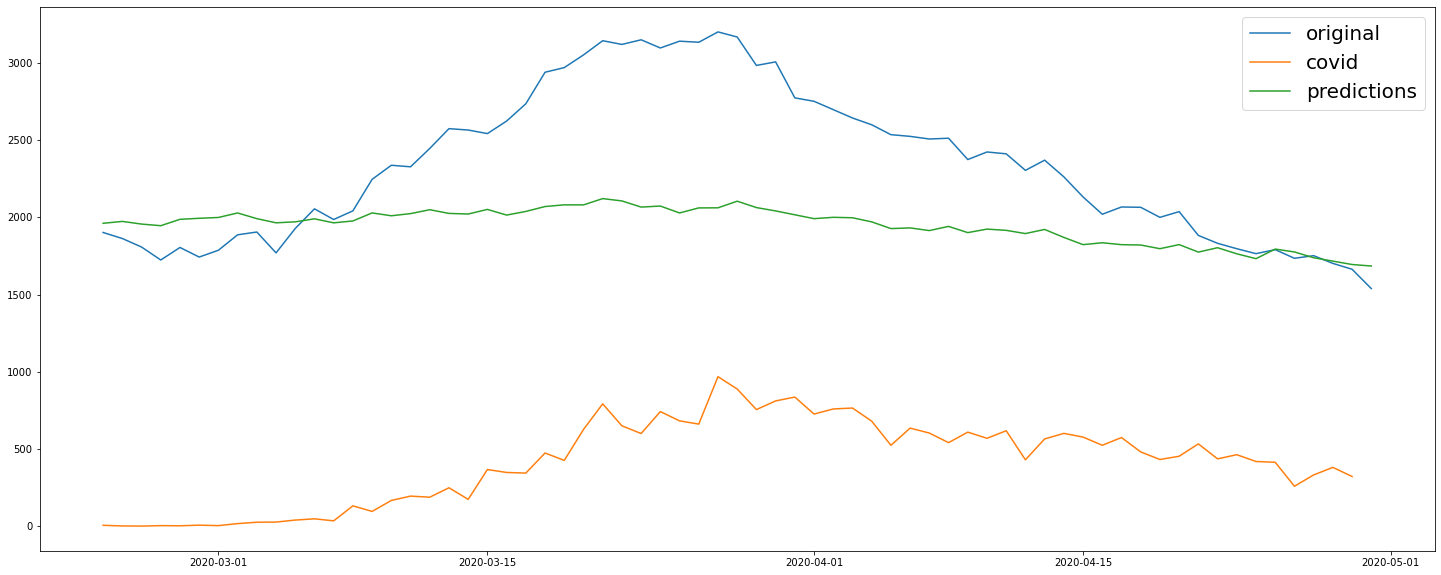

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

plt.plot(ts_covid_period, label='original')
plt.plot(ts_decessi_covid, label='covid')
plt.plot(ts_predictions_covid_period, label='predictions')

plt.legend(prop={'size': 20})
plt.show()

In [56]:
print('Decessi totali in data 27/03/2020 =', ts_covid_period['2020-03-27'])

Decessi totali in data 27/03/2020 = 3200


In [57]:
print('Decessi COVID19 in data 27/03/2020 =', ts_decessi_covid['2020-03-27'])

Decessi COVID19 in data 27/03/2020 = 969.0


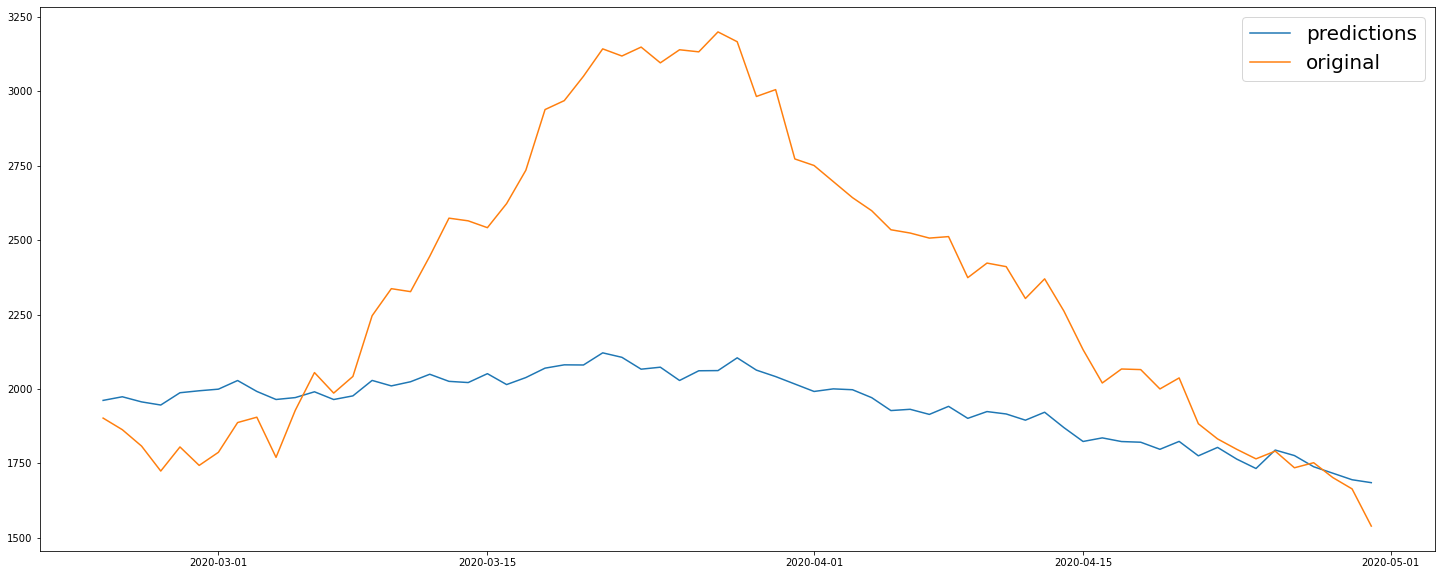

In [58]:
plt.figure(figsize=(25,10))

plt.plot(ts_predictions_covid_period, label='predictions')
plt.plot(ts_covid_period, label='original')
plt.legend(prop={'size': 20})
plt.show()

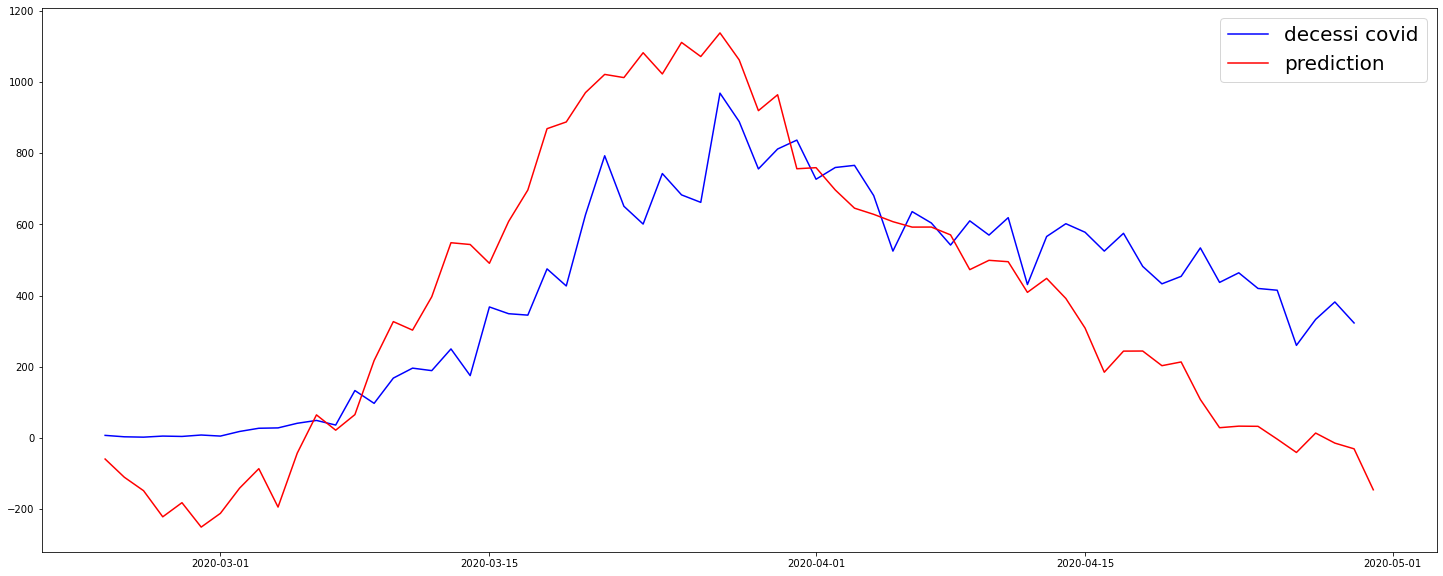

In [59]:
n = ts_covid_period - ts_predictions_covid_period #n = decessi covid secondo il modello

plt.figure(figsize=(25,10))
plt.plot(ts_decessi_covid, color='blue', label='decessi covid')
plt.plot(n, color='red', label='prediction')
plt.legend(prop={'size': 20})
plt.show()

In [60]:
n

Data
2020-02-24    -59.492454
2020-02-25   -110.672493
2020-02-26   -148.479795
2020-02-27   -221.912653
2020-02-28   -182.213620
                 ...    
2020-04-26    -41.058902
2020-04-27     13.506413
2020-04-28    -14.740217
2020-04-29    -30.799265
2020-04-30   -145.973387
Name: Totale, Length: 67, dtype: float64

In [61]:
total = n.sum()
print(int(total))

25710


In [62]:
# numero di decessi non registrati
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

-1825
